In [87]:
import pandas as pd
churn_data = pd.read_csv('/Users/artemmoskvin/Documents/Data-Science/Data/churn.csv',sep=',')
churn_data.drop(['RowNumber'],axis=1,inplace=True)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [88]:
import plotly
import plotly.express as px

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
import seaborn as sns

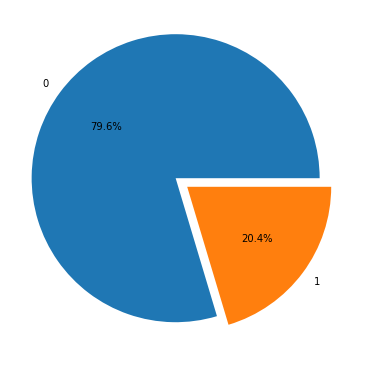

In [91]:
clients_kind = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    clients_kind,
    labels=clients_kind.index,
    autopct='%.1f%%',
    explode = [0.1, 0]
);

Задание 9.1. Исходя из данных таблицы, цифра "0" обозначает лояльного клиента, а цифра "1" - ушедшего клиента. Из диаграммы можно сделать вывод, что доля лояльных клиентов - 79,6%, а доля ушедших клиентов - 20,4%. В представленной таблице лояльных клиентов в 4 раза больше, чем ушедших.

''

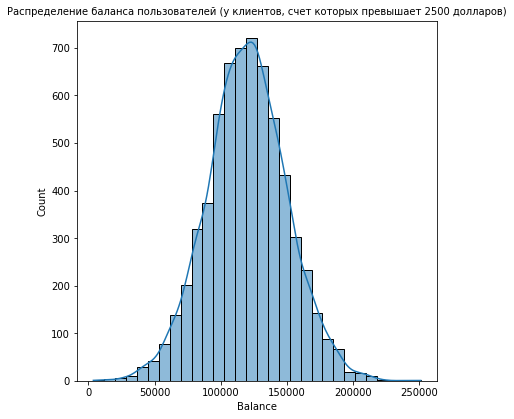

In [92]:
rich_clients = churn_data[churn_data['Balance'] > 2500]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Распределение баланса пользователей (у клиентов, счет которых превышает 2500 долларов)', fontsize=10)
sns.histplot(
    data=churn_data,
    x=rich_clients['Balance'],
    bins=30,
    kde=True,
    ax=axes
)
;

Задание 9.2. У большинства клиентов банка, счет которых превышает 2500 долларов, в банк вложено от 100 до 150 тысяч долларов. Вложения на уровне 50 тысяч долларов, а также на уровне 200 тысяч долларов являются редкостью. В банке нет вложений свыше 250 тысяч долларов.

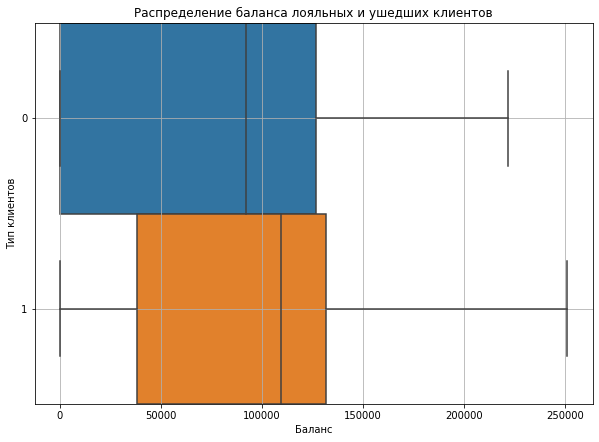

In [93]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=1
)
boxplot.set_title('Распределение баланса лояльных и ушедших клиентов');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Тип клиентов');
boxplot.grid()

Задание 9.3. На счетах лояльных клиентов (обозначены цифрой 0) чаще всего хранятся деньги от 0 до 120 тысяч долларов, а наиболее частое вложение - 90 тысяч долларов. На счетах ушедших клиентов (обозначены цифрой 1) чащего всего хранились деньги от 40 тысяч долларов до 125 тысяч долларов, а наиболее частое вложение - 110 тысяч долларов. Самое главное отличие - ушедшие клиенты не хранили в банке деньги до 40 тысяч долларов. Скорее всего, они могли перевести свои накопления в банки с более высокой процентной ставкой по депозитам. Следовательно, их, возможно, не устраивают процентные ставки по депозитам в банке, из которого они ушли.

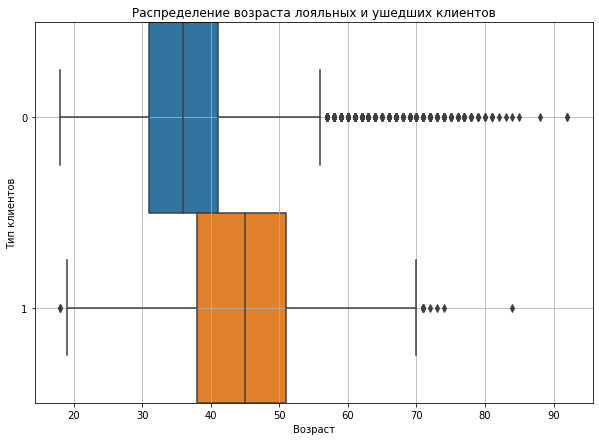

In [94]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=1
)
boxplot.set_title('Распределение возраста лояльных и ушедших клиентов');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Тип клиентов');
boxplot.grid()

Задание 9.4. Лояльные клиенты - чаще всего более молодые, от 30 до 40 лет, наиболее популярный возраст - 36 лет. Ушедшие клиенты - старше, чем лояльные, чаще всего от 38 до 51 года, наиболее популярный возраст - 45 лет. Отметим, что в группе лояльных клиентов больше "выбросов", то есть людей с необычным для распределения возрастом, а именно - старшей возрастной группы (от 55 до 90 лет). Отток клиентов, возможно, связан с предоставлением другими банками интересных предложений и скидок для людей старше 40 лет. На это можно обратить внимание и попытаться удержать людей старшего возраста.

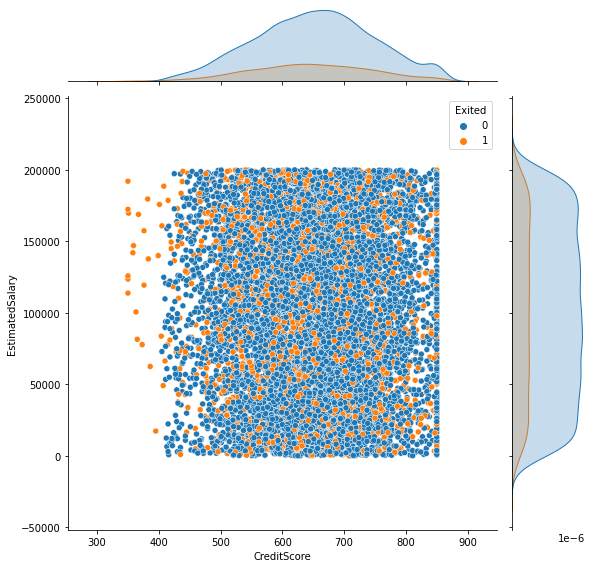

In [95]:
rating = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    height=8,
)

Задание 9.5. Кредитный рейтинг явно не взаимосвязан с предполагаемой заработной 

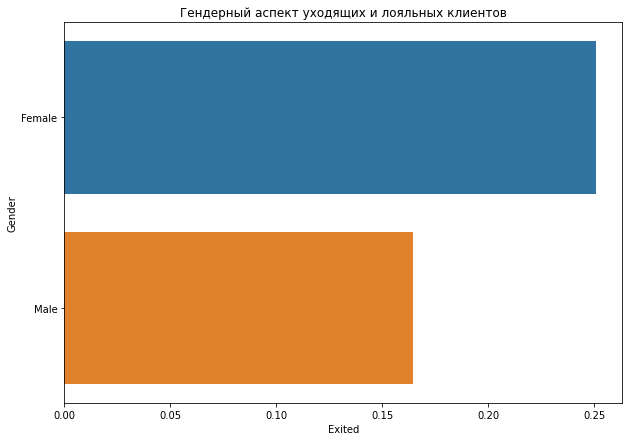

In [96]:
bar_data = churn_data.groupby(
    by='Gender',
    as_index=False
)['Exited'].mean()
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=bar_data,
    x='Exited',
    y='Gender',
)
barplot.set_title('Гендерный аспект уходящих и лояльных клиентов');

Задание 9.6. Чаще уходят женщины (поскольку их показатель ближе к 1).

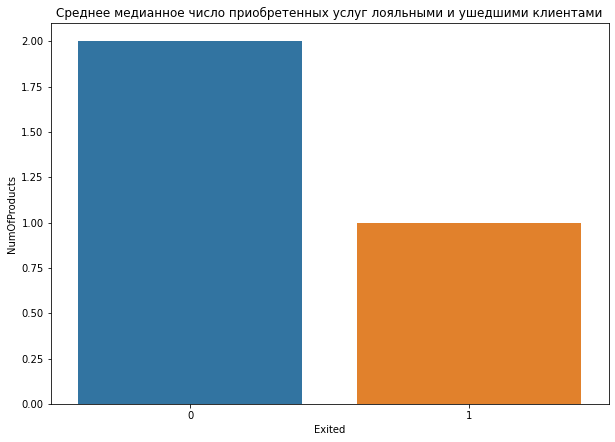

In [97]:
bar_data = churn_data.groupby(
    by='Exited',
    as_index=False
)['NumOfProducts'].median()
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=bar_data,
    x='Exited',
    y='NumOfProducts',   
)
barplot.set_title('Среднее медианное число приобретенных услуг лояльными и ушедшими клиентами');

Задание 9.7. Ушедшие клиенты в среднем приобретали одну услугу, а лояльные клиенты в среднем приобретали две услуги.

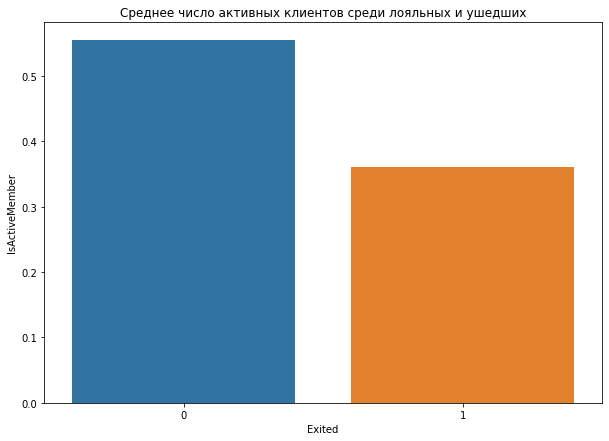

In [98]:
bar_data1 = churn_data.groupby(
    by='Exited',
    as_index=False
)['IsActiveMember'].mean()
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=bar_data1,
    x='Exited',
    y='IsActiveMember',   
)
barplot.set_title('Среднее число активных клиентов среди лояльных и ушедших');

Задание 9.8. В среднем, среди лояльных клиентов активных клиентов больше. Следовательно, чтоб уменьшить отток клиентов, нужно придумывать различные продукты для повышения активности клиентов.

CustomerId,15565701,15565706,15565714,15565779,15565796,15565806,15565878,15565879,15565891,15565996,...,15815534,15815552,15815560,15815615,15815626,15815628,15815645,15815656,15815660,15815690
Geography,,,,,,,,,,,,,,,,,,,,,
France,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,...,NaN,0.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,NaN
Germany,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Spain,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


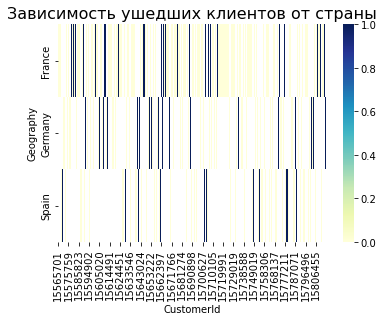

In [101]:
state = churn_data.pivot_table(
    values='Exited',
    columns='CustomerId',
    index='Geography',
)
state.columns = state.columns.astype('string')
display(state)
heatmap = sns.heatmap(data=state, cmap='YlGnBu')
heatmap.set_title('Зависимость ушедших клиентов от страны', fontsize=16);


Задание 9.9. Больше всего ушедших клиентов - во Франции. Возможно, в этой стране живут наиболее пожилые пользователи изучаемого банка.

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


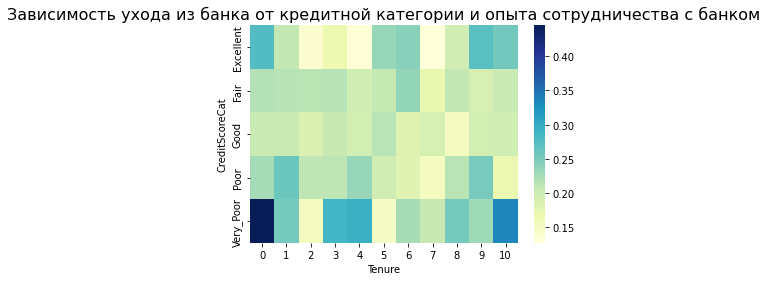

In [103]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

cat = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
display(cat)
heatmap = sns.heatmap(data=cat, cmap='YlGnBu')
heatmap.set_title('Зависимость ухода из банка от кредитной категории и опыта сотрудничества с банком', fontsize=16);


Задание 9.10. Чаще всего уходят очень бедные клиенты с опытом сотрудничества с банком от 0 до 1 года. Достаточно часто уходят и обеспеченные клиенты. Наиболее лояльные клиенты - это люди среднего достатка.